## Rossmann Store Sale Prediction
#### Dataset Overview
 * The dataset consists of historical sales data for Rossmann stores, including information such as store type, assortment, promotions and more. 
 * Features include store ID, date, sales, customers, promotional activities and store characteristics.
* The target variable is the sales figure for each store on a given day.

In [1]:
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVR
import eli5
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
import seaborn as sns
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store = pd.read_csv("store.csv")

In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df = pd.merge(train_df,store, how="inner", on="Store")
test_df = pd.merge(test_df, store, how="inner", on="Store")

In [7]:
train_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
881447,268,4,2013-05-02,6700,753,1,1,0,0,a,a,4520.0,2.0,2014.0,0,NaN,NaN,NaN
283809,817,2,2014-11-11,24478,3263,1,1,0,0,a,a,140.0,3.0,2006.0,0,NaN,NaN,NaN
569558,579,4,2014-02-06,8722,925,1,1,0,0,c,a,20970.0,11.0,2012.0,0,NaN,NaN,NaN
396777,610,7,2014-07-13,0,0,0,0,0,0,a,a,660.0,1.0,2007.0,0,NaN,NaN,NaN
556935,221,1,2014-02-17,7704,668,1,1,0,0,d,c,13530.0,9.0,2013.0,0,NaN,NaN,NaN


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
train_df.shape

(1017209, 18)

In [10]:
train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [11]:
train_df["CompetitionDistance"].replace(np.nan, train_df["CompetitionDistance"].mean(), inplace=True)
train_df.fillna(0, inplace=True)

In [12]:
train_df['Store'].nunique()

1115

In [13]:
train_df["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [14]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [15]:
train_df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [16]:
train_df["Customers"].describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [17]:
train_df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [18]:
train_df["StateHoliday"].replace('0', 0, inplace=True)

In [19]:
train_df["SchoolHoliday"].unique()

array([1, 0])

In [20]:
train_df["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [21]:
train_df["Assortment"].unique()

array(['a', 'c', 'b'], dtype=object)

In [22]:
train_df['CompetitionDistance'].describe()

count    1.017209e+06
mean     5.430086e+03
std      7.705298e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [23]:
train_df["Promo2"].unique()

array([0, 1])

In [24]:
train_df["CompetitionOpenSinceMonth"].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  0.,  3.,  6.,  5.,  1.,  2.,  7.])

In [25]:
train_df["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [26]:
train_df['Promo2SinceWeek'].unique()

array([ 0., 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [27]:
train_df["Promo2SinceYear"].unique()

array([   0., 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [28]:
train_df["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [29]:
train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056
CompetitionDistance,1017209.0,5430.085652,20.0,710.0,2330.0,6880.0,75860.0,7705.297659
CompetitionOpenSinceMonth,1017209.0,4.926878,0.0,0.0,4.0,9.0,12.0,4.283543


In [30]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [31]:
train_df["Day"] = train_df["Date"].dt.day
train_df["Month"] = train_df["Date"].dt.month
train_df["Year"] = train_df["Date"].dt.year
train_df["Day_Name"] = train_df["Date"].dt.day_name
train_df.drop("Date", axis=1, inplace=True)

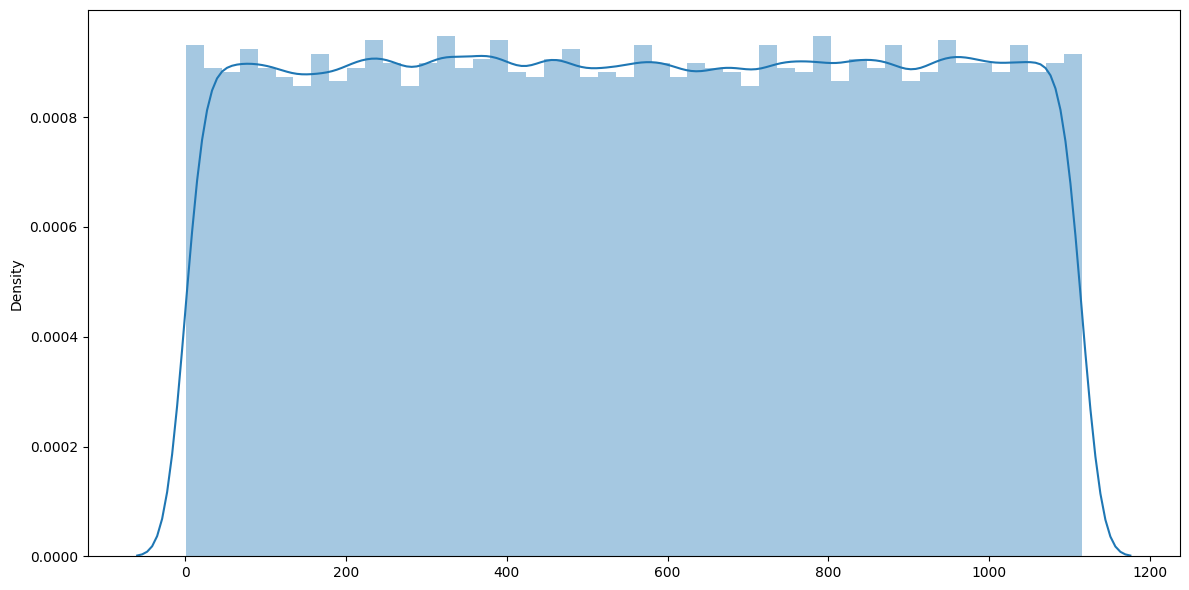

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(x=train_df["Store"])
plt.tight_layout()

In [33]:
day_df = train_df.groupby("Day")["Sales"].mean().to_frame().reset_index()
day_name_df = train_df.groupby("Day_Name")["Sales"].mean().to_frame().reset_index()
month_df = train_df.groupby("Month")["Sales"].mean().to_frame().reset_index()
year_df = train_df.groupby("Year")["Sales"].mean().to_frame().reset_index()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

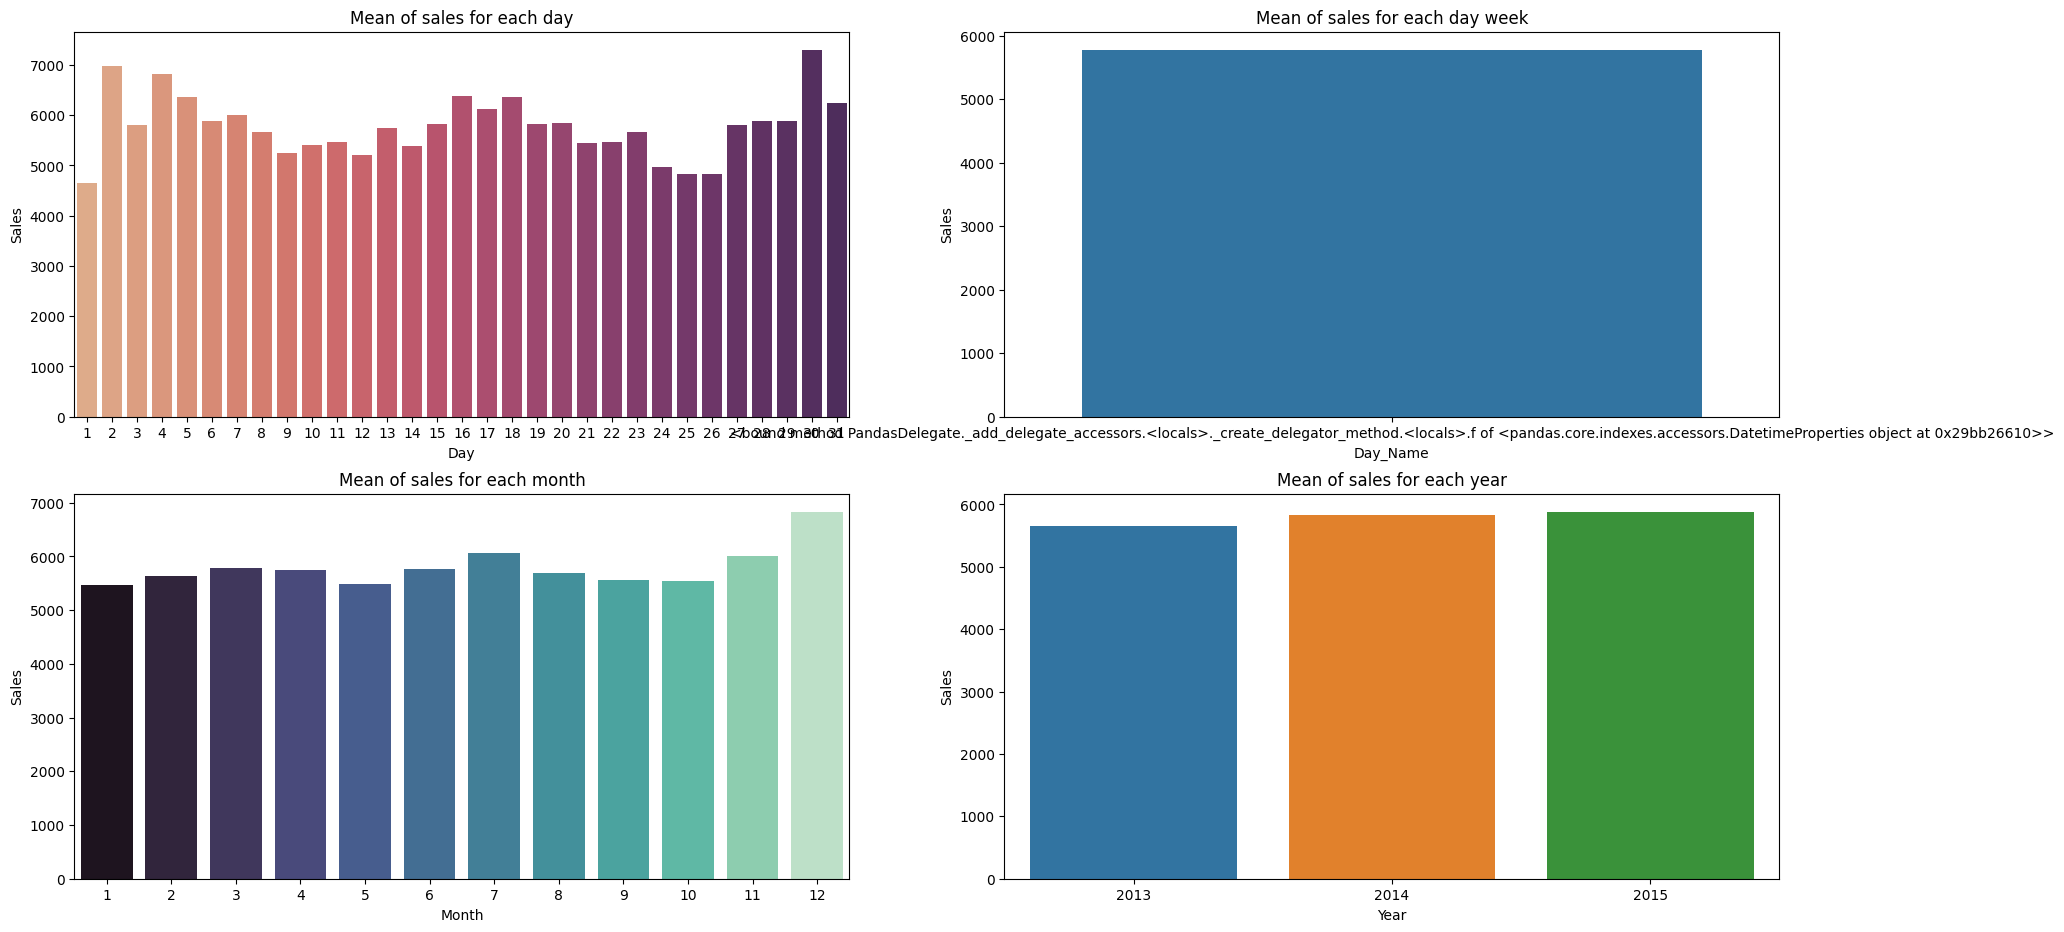

In [34]:
fig, ax = plt.subplots(2,2,figsize = (22,11))
ax1 = sns.barplot(x = day_df["Day"], y=day_df["Sales"], ax=ax[0,0], palette="flare")
ax1.set_title("Mean of sales for each day")
ax2 = sns.barplot(x=day_name_df["Day_Name"], y=day_name_df["Sales"], ax=ax[0,1])
ax2.set_title("Mean of sales for each day week")
ax3 = sns.barplot(x=month_df["Month"], y=month_df["Sales"], ax=ax[1,0], palette="mako")
ax3.set_title("Mean of sales for each month")
ax4 = sns.barplot(x=year_df["Year"], y=year_df["Sales"], ax=ax[1,1])
ax4.set_title("Mean of sales for each year")
plt.tight_layout

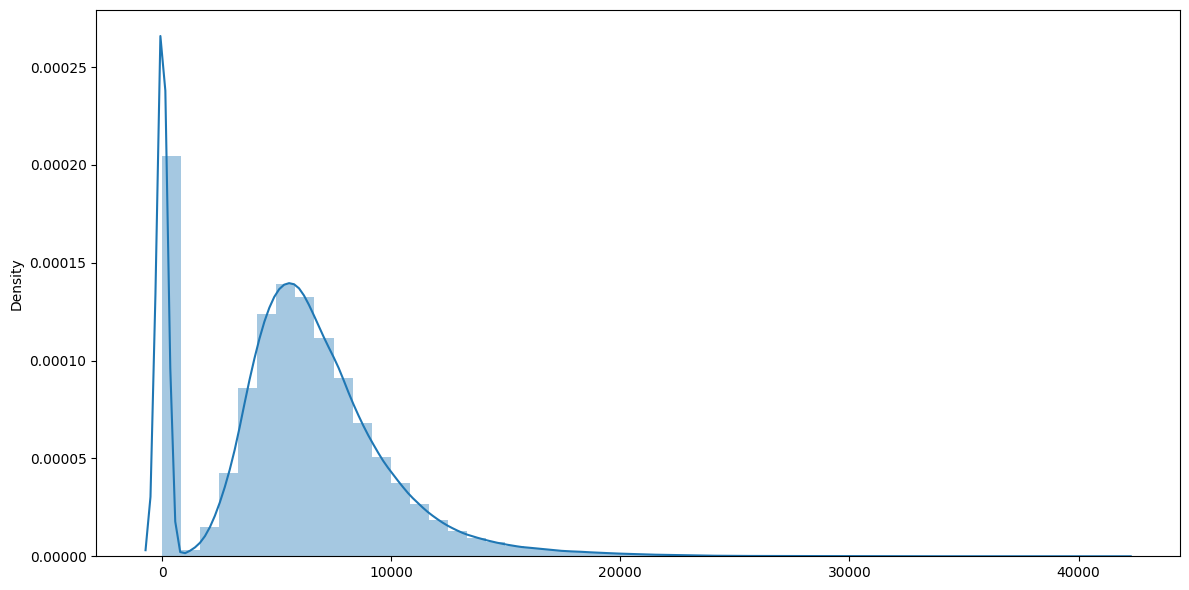

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(x=train_df["Sales"])
plt.tight_layout()

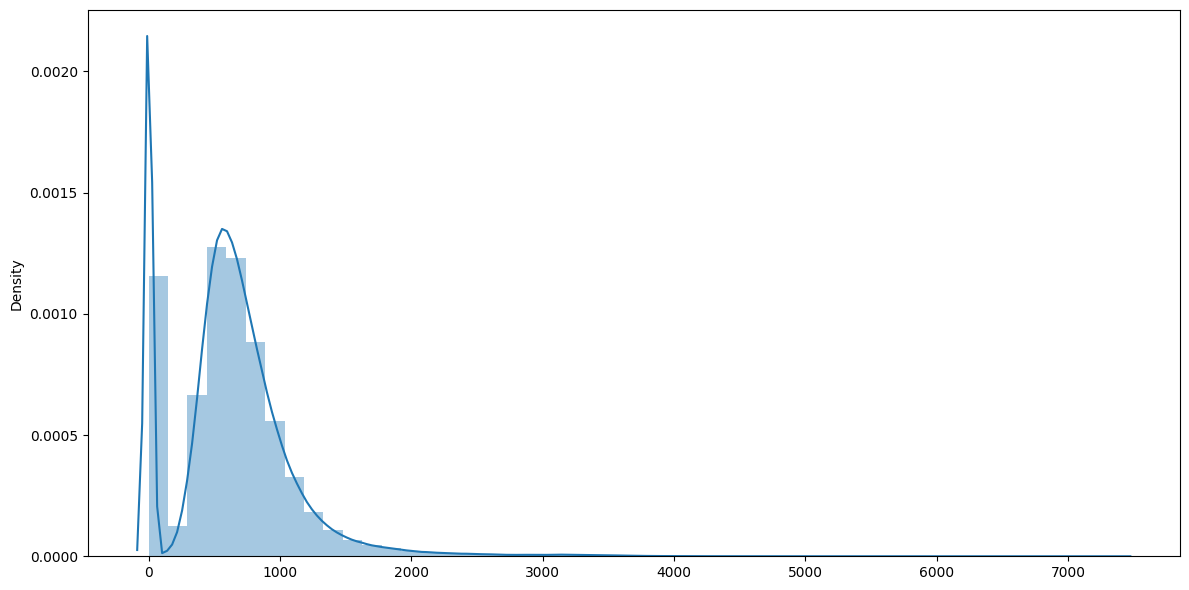

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(x=train_df["Customers"])
plt.tight_layout()

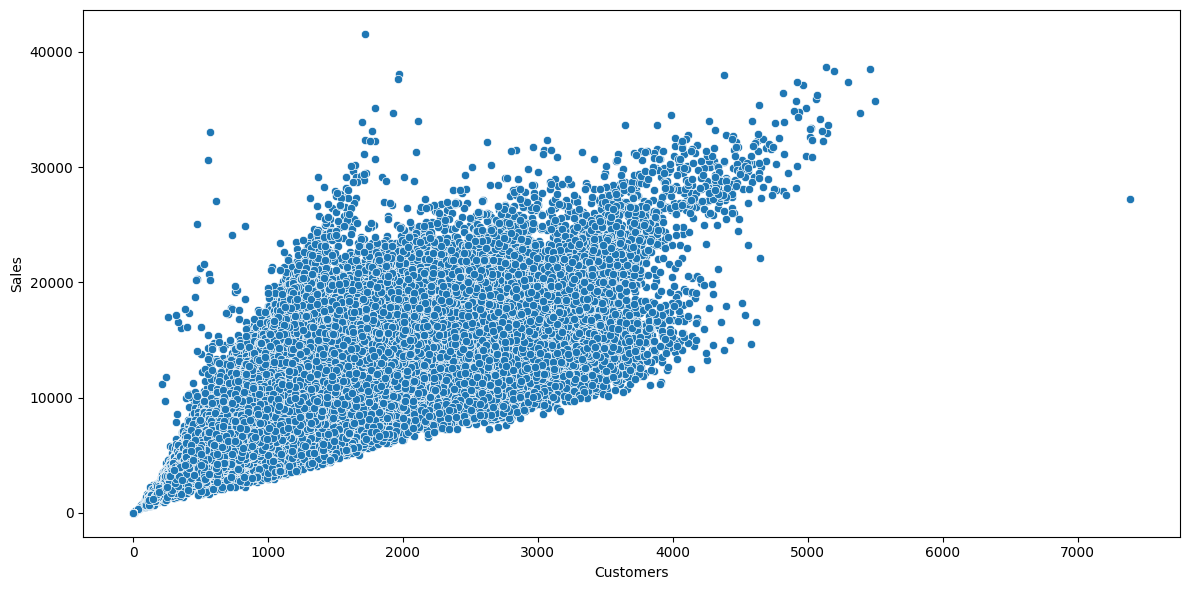

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Customers"], y=train_df["Sales"])
plt.tight_layout()

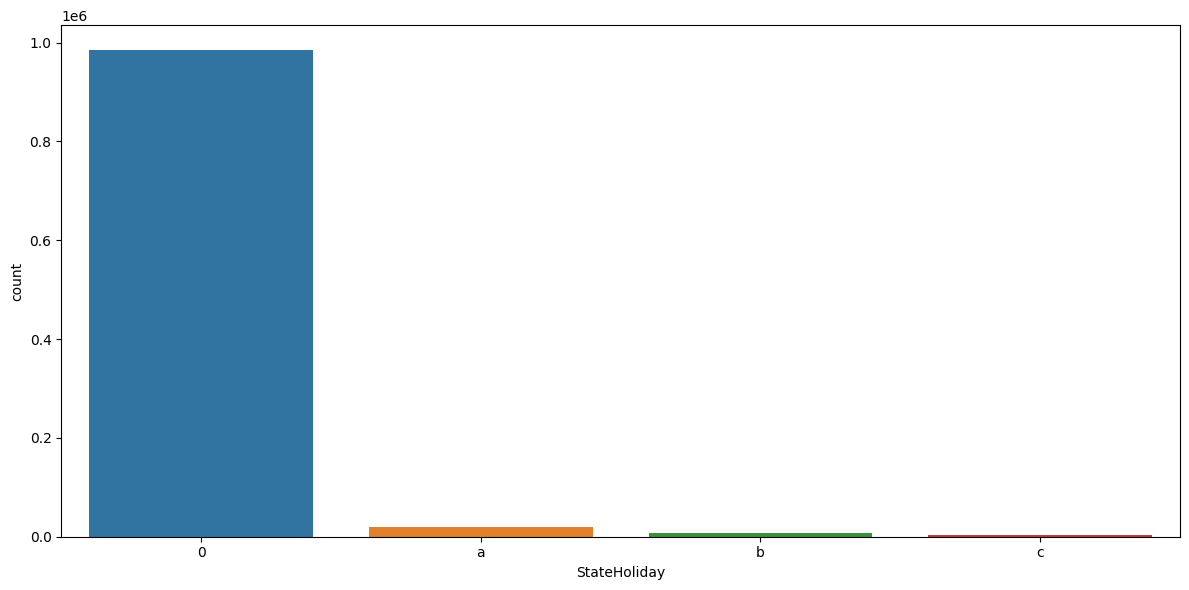

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df['StateHoliday'])
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

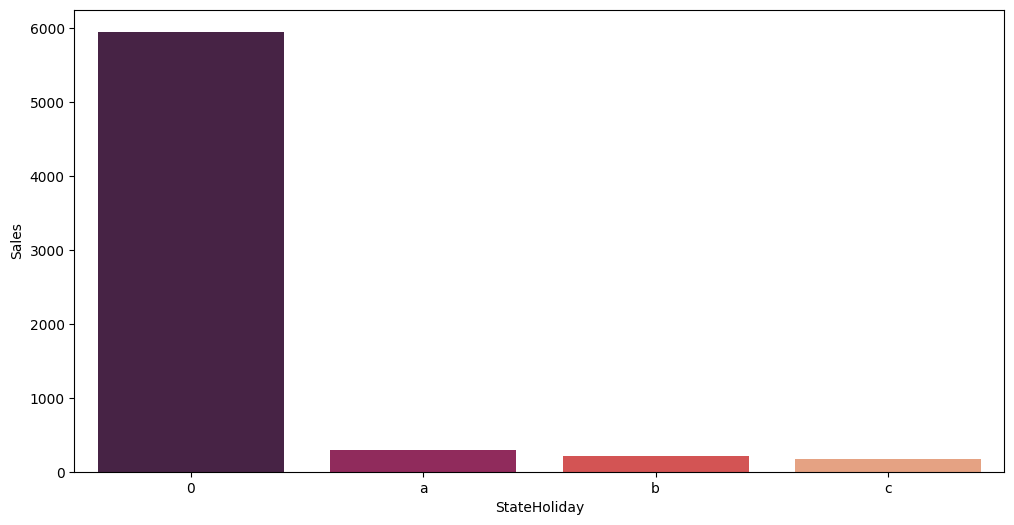

In [39]:
plt.figure(figsize=(12,6))
StateHoliday_df = train_df.groupby("StateHoliday")['Sales'].mean().to_frame().reset_index()
sns.barplot(x=StateHoliday_df["StateHoliday"], y=StateHoliday_df['Sales'], palette="rocket")
plt.tight_layout

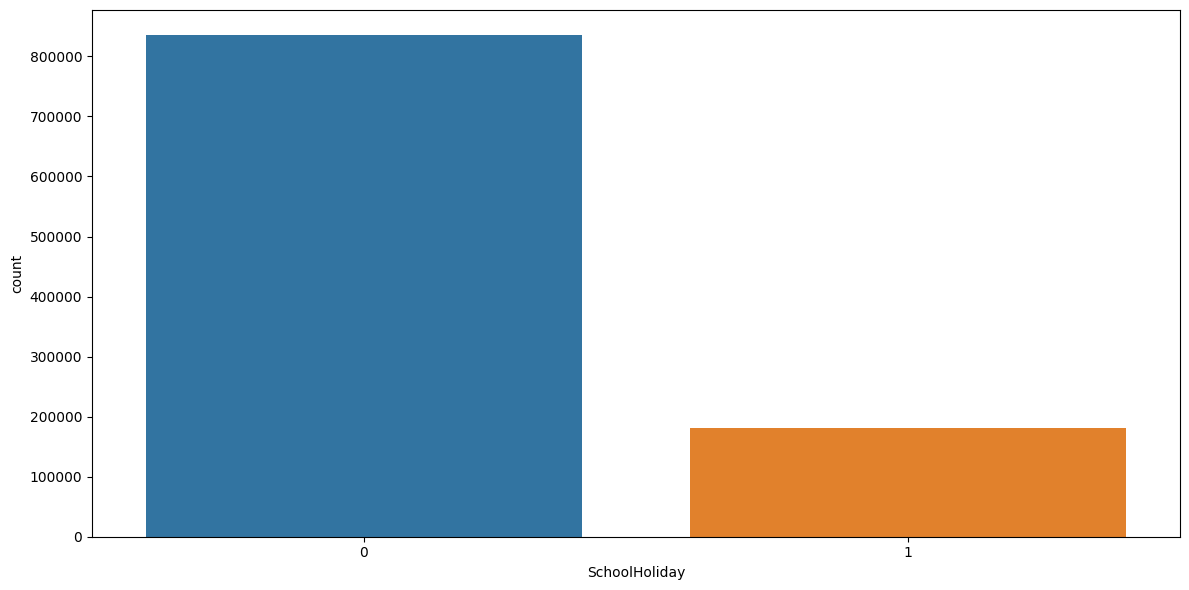

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df["SchoolHoliday"])
plt.tight_layout()

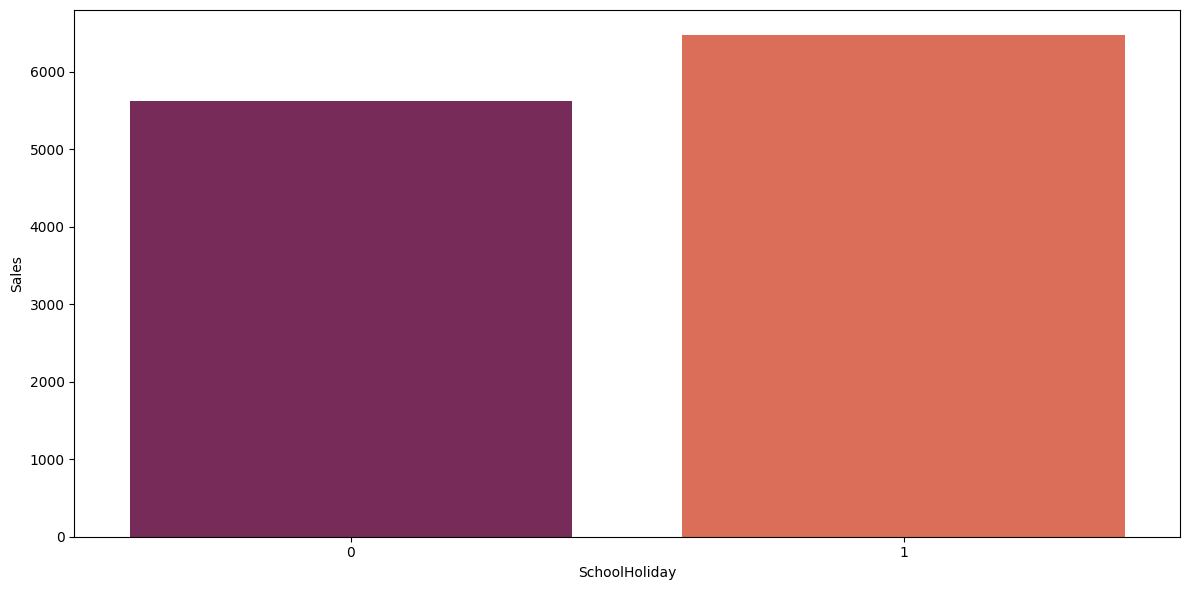

In [41]:
plt.figure(figsize=(12,6))
Schoolholiday_df = train_df.groupby("SchoolHoliday")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=Schoolholiday_df["SchoolHoliday"], y=Schoolholiday_df["Sales"],palette="rocket")
plt.tight_layout()

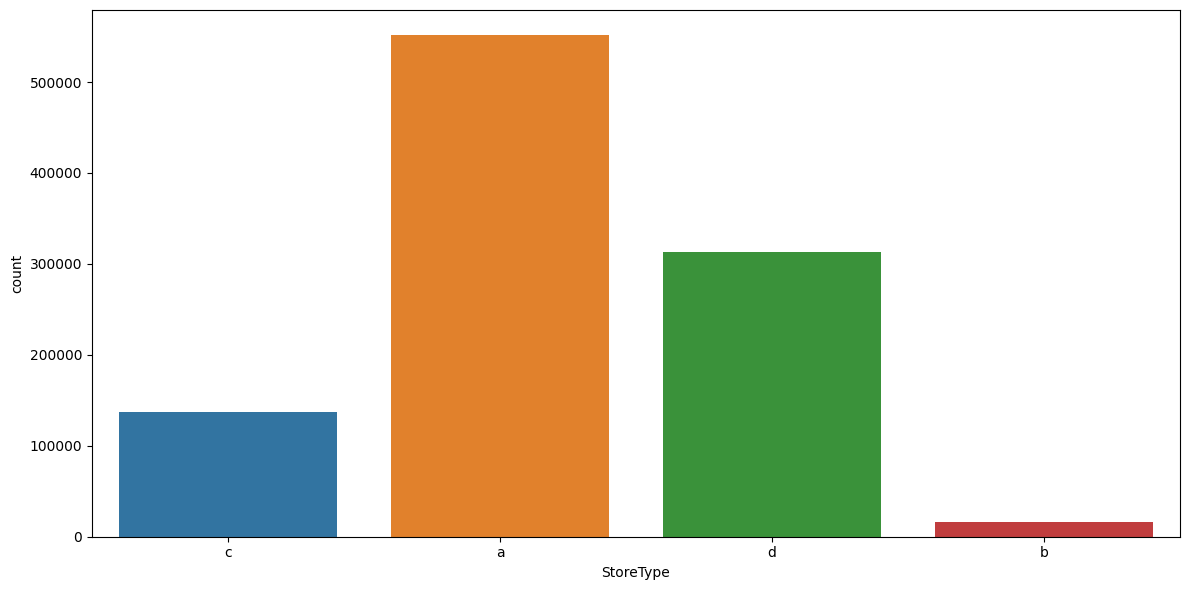

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df["StoreType"])
plt.tight_layout()

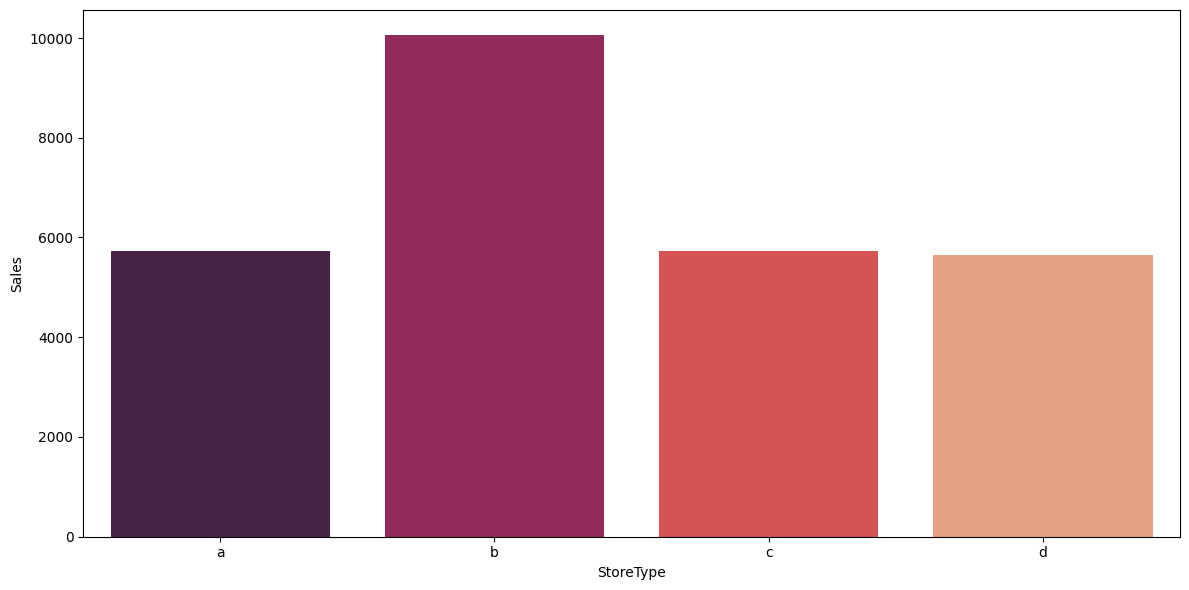

In [43]:
plt.figure(figsize=(12,6))
store_type_df = train_df.groupby("StoreType")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=store_type_df["StoreType"], y=store_type_df["Sales"], palette="rocket")
plt.tight_layout()

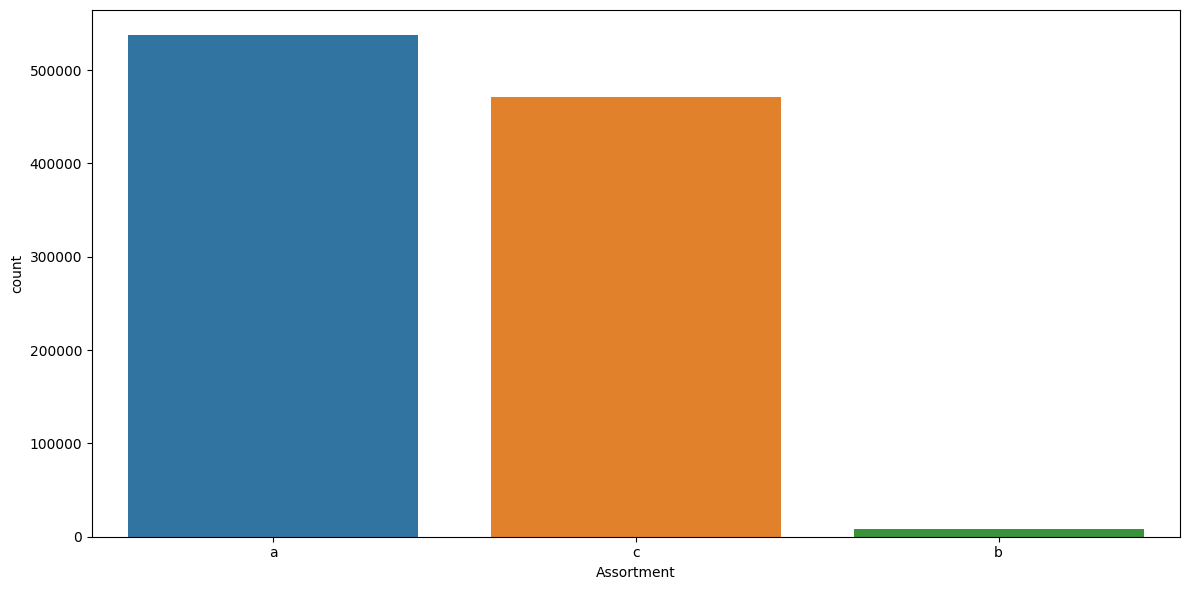

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df["Assortment"])
plt.tight_layout()

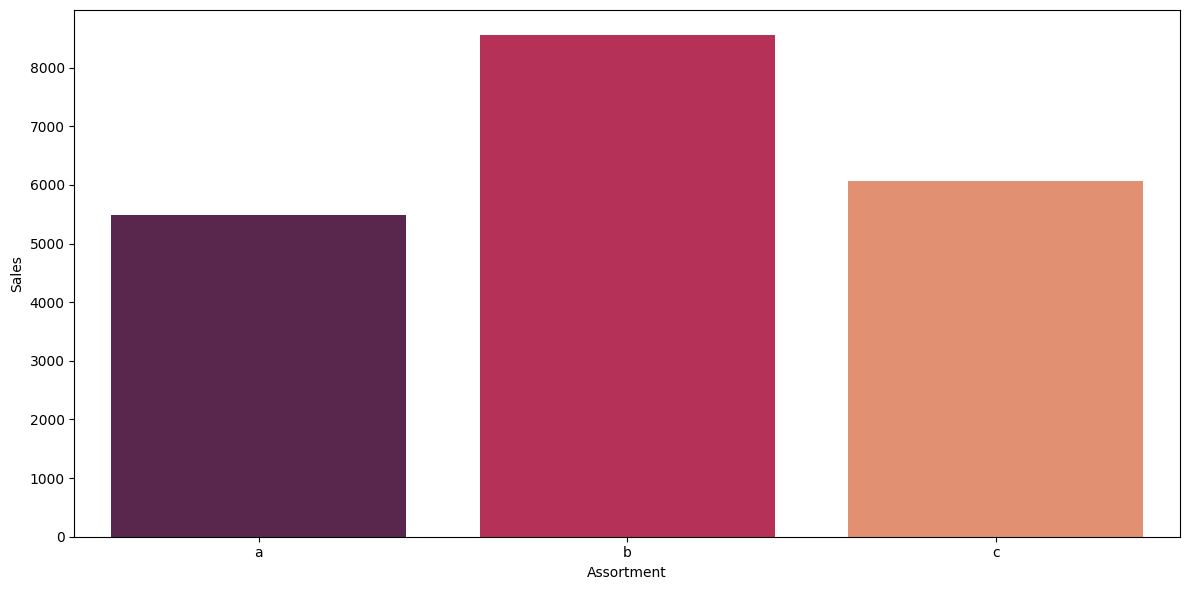

In [45]:
plt.figure(figsize=(12,6))
assortment_df = train_df.groupby("Assortment")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=assortment_df["Assortment"], y=assortment_df["Sales"],palette="rocket")
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

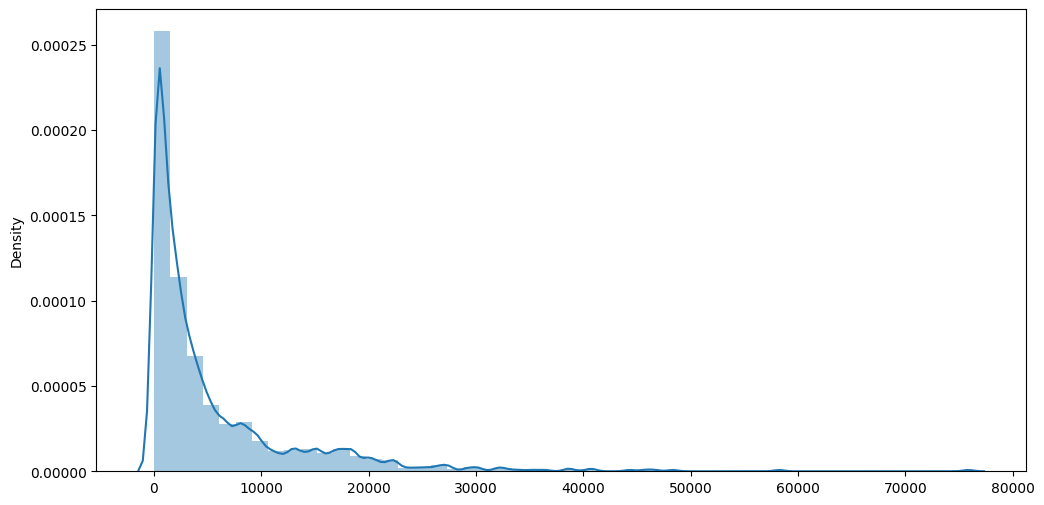

In [46]:
plt.figure(figsize=(12,6))
sns.distplot(x=train_df["CompetitionDistance"])
plt.tight_layout

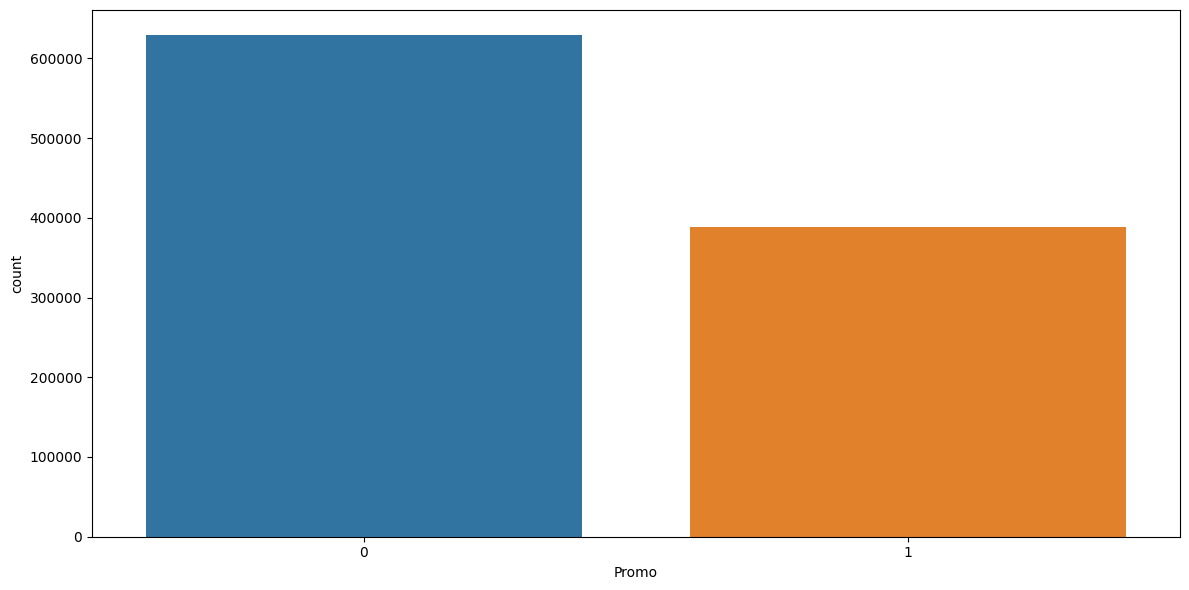

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df["Promo"])
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

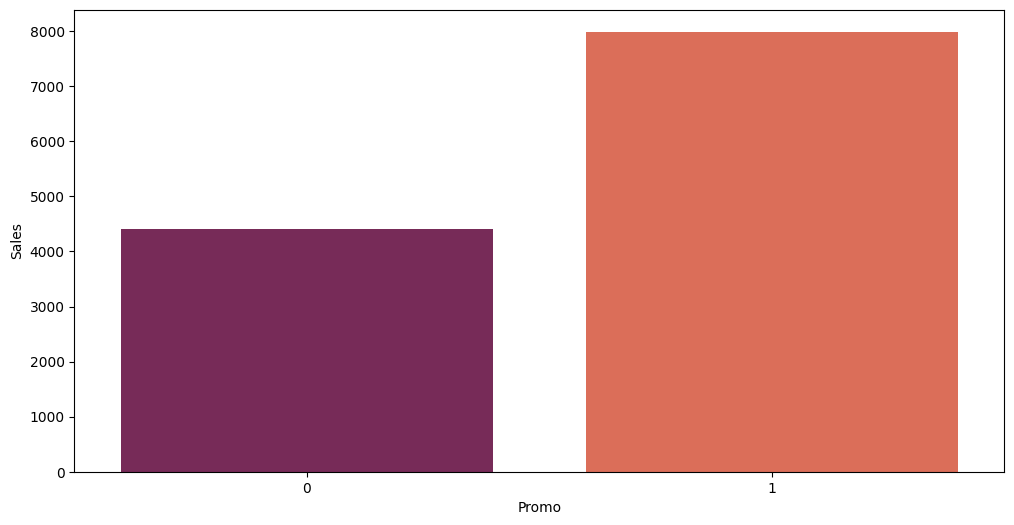

In [48]:
plt.figure(figsize=(12,6))
promo_df = train_df.groupby("Promo")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=promo_df["Promo"], y=promo_df["Sales"], palette="rocket")
plt.tight_layout

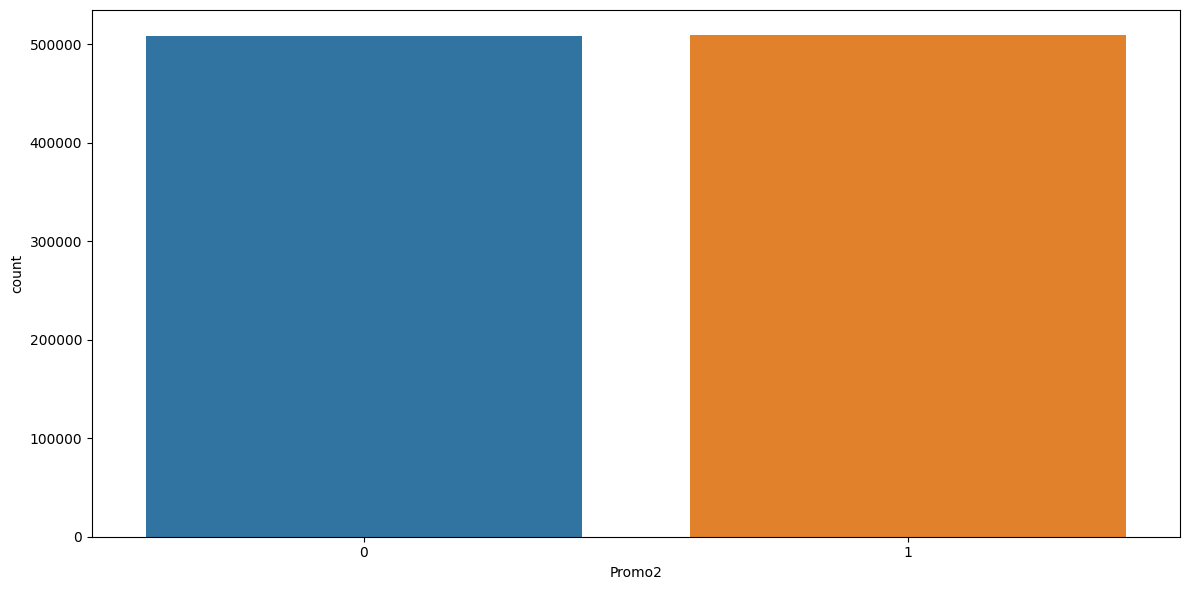

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df["Promo2"])
plt.tight_layout()

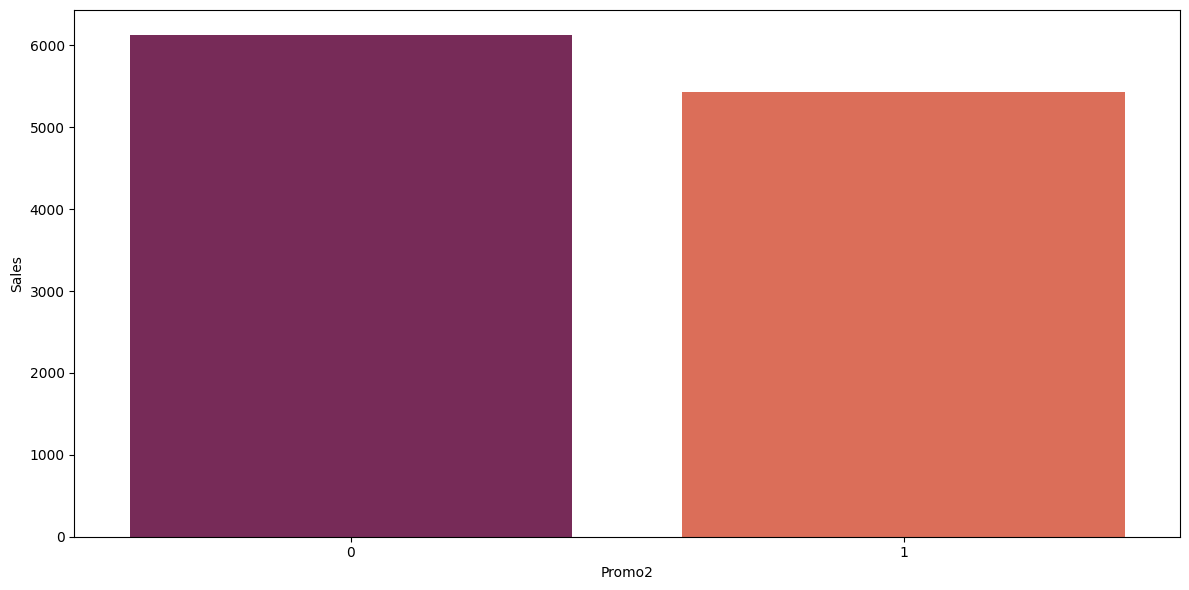

In [50]:
plt.figure(figsize=(12,6))
promo2_df = train_df.groupby("Promo2")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=promo2_df["Promo2"], y=promo2_df["Sales"], palette="rocket")
plt.tight_layout()

In [51]:
train_df.drop("Day_Name", axis=1, inplace=True)

In [52]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,31,7,2015
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,31,7,2015


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

In [54]:
train_df["StateHoliday"].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [55]:
train_df["StateHoliday"] = train_df["StateHoliday"].replace("a", "Public Holiday").replace("b", "Easter Holiday").replace("c", "Christmas").replace(0,"No holiday")

In [56]:
train_df["StoreType"].value_counts()

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

In [57]:
train_df["StoreType"] = train_df["StoreType"].replace("a", "Type A").replace("b", "Type B").replace("c", "Type C").replace("d", "Type D")

In [58]:
train_df["Assortment"].value_counts()

Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

In [59]:
train_df["Assortment"] = train_df["Assortment"].replace("a", "Basic").replace("b", "Extra").replace("c", "Extended")

In [60]:
train_df["PromoInterval"].value_counts()

PromoInterval
0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64

In [61]:
train_df["PromoInterval"] = train_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [62]:
StateHoliday_dumm = pd.get_dummies(train_df["StateHoliday"])
train_df = pd.concat([train_df, StateHoliday_dumm], axis=1)
train_df.drop("StateHoliday", axis=1, inplace=True)

In [63]:
storetype_dumm = pd.get_dummies(train_df["StoreType"])
train_df = pd.concat([train_df, storetype_dumm], axis=1)
train_df.drop("StoreType", axis=1, inplace=True)

In [64]:
assortment_dumm = pd.get_dummies(train_df["Assortment"])
train_df = pd.concat([train_df, assortment_dumm], axis=1)
train_df.drop("Assortment", axis=1, inplace=True)

In [65]:
promointerval_dumm = pd.get_dummies(train_df["PromoInterval"])
train_df = pd.concat([train_df, promointerval_dumm], axis=1)
train_df.drop("PromoInterval", axis=1, inplace=True)

In [66]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,Christmas,Easter Holiday,No holiday,Public Holiday,Type A,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,31,7,2015,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,31,7,2015,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,31,7,2015,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,0.0,0.0,31,7,2015,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,31,7,2015,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True


In [67]:
train_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,Christmas,Easter Holiday,No holiday,Public Holiday,Type A,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
Store,1.000000,-8.483588e-06,0.005126,0.024325,-0.000047,5.786226e-05,0.000641,-0.026394,-0.032893,-0.008794,0.008488,0.011053,0.008520,2.259853e-05,0.001467,0.000290,1.443168e-04,-1.086178e-04,-0.000542,0.000665,0.005579,0.001412,0.060986,-0.051492,-0.006140,0.002661,0.019328,8.035330e-03,0.012181,-0.013087,-0.008488
DayOfWeek,-0.000008,1.000000e+00,-0.462125,-0.386445,-0.528963,-3.929253e-01,-0.205388,-0.000025,0.000008,0.000007,0.000168,0.000208,0.000168,5.136457e-03,-0.005362,0.001937,-1.345413e-03,-4.066836e-02,0.052889,-0.040981,-0.000034,-0.000019,-0.000039,0.000071,0.000052,-0.000051,-0.000007,-3.017220e-07,0.000198,-0.000019,-0.000168
Sales,0.005126,-4.621250e-01,1.000000,0.894711,0.678472,4.523447e-01,0.085124,-0.019210,-0.012431,0.002749,-0.091040,-0.044143,-0.091056,-1.161188e-02,0.048768,0.023519,-9.261768e-02,-1.174965e-01,0.254216,-0.203028,-0.010076,0.139940,-0.005140,-0.022854,-0.080494,0.068772,0.065473,-4.366787e-02,-0.034946,-0.053267,0.091040
Customers,0.024325,-3.864447e-01,0.894711,1.000000,0.616768,3.161695e-01,0.071568,-0.102780,-0.015188,0.000489,-0.150159,-0.098323,-0.150138,-4.473140e-03,0.038179,-0.001212,-8.300669e-02,-1.045224e-01,0.226608,-0.180900,0.060679,0.366726,0.034059,-0.189039,-0.031864,-0.017859,0.275905,-6.547287e-02,-0.078401,-0.063053,0.150159
Open,-0.000047,-5.289625e-01,0.678472,0.616768,1.000000,2.950423e-01,0.086171,0.007981,-0.000200,-0.001144,-0.008309,-0.007436,-0.008308,3.342796e-02,-0.000681,-0.001009,-1.376851e-01,-1.751578e-01,0.378378,-0.302107,-0.004373,0.051233,-0.004709,-0.005538,-0.006438,-0.000522,0.038631,-3.608057e-03,-0.005269,-0.002074,0.008309
Promo,0.000058,-3.929253e-01,0.452345,0.316169,0.295042,1.000000e+00,0.067483,0.000138,-0.000039,-0.000034,-0.000983,-0.001210,-0.000983,-1.083245e-01,-0.011747,0.024300,-4.996370e-02,1.984658e-02,0.012353,-0.004034,0.000204,0.000108,0.000223,-0.000414,-0.000296,0.000290,0.000039,-6.029887e-07,-0.001154,0.000107,0.000983
SchoolHoliday,0.000641,-2.053883e-01,0.085124,0.071568,0.086171,6.748281e-02,1.000000,-0.003684,-0.001688,-0.001801,-0.006909,-0.006679,-0.006912,3.053818e-02,0.103282,-0.036535,1.364053e-01,1.590977e-01,-0.148651,0.029126,-0.000687,0.001825,0.001557,-0.000899,0.002464,-0.002576,0.000608,-2.109399e-03,-0.004427,-0.002624,0.006909
CompetitionDistance,-0.026394,-2.458113e-05,-0.019210,-0.102780,0.007981,1.380672e-04,-0.003684,1.000000,-0.034400,-0.002894,-0.139704,-0.123647,-0.139767,4.860997e-05,0.003573,0.000702,3.517291e-04,-2.652260e-04,0.000784,-0.000972,-0.037179,-0.071210,-0.097901,0.131616,-0.141214,0.150360,-0.049883,-5.064480e-02,-0.082631,-0.054952,0.139704
CompetitionOpenSinceMonth,-0.032893,8.338445e-06,-0.012431,-0.015188,-0.000200,-3.919081e-05,-0.001688,-0.034400,1.000000,0.784968,-0.081027,-0.108546,-0.080952,-1.213118e-05,-0.001037,-0.000203,-1.021516e-04,7.718315e-05,0.001179,-0.001450,0.037553,-0.039814,0.015645,-0.041428,0.100431,-0.091268,-0.051397,-1.794370e-02,-0.056377,-0.031330,0.081027
CompetitionOpenSinceYear,-0.008794,6.677520e-06,0.002749,0.000489,-0.001144,-3.429440e-05,-0.001801,-0.002894,0.784968,1.000000,-0.097433,-0.124378,-0.097363,-1.137384e-05,-0.000897,-0.000176,-8.833719e-05,6.667669e-05,0.002091,-0.002573,0.058360,-0.039637,0.034669,-0.078003,0.127335,-0.115449,-0.066661,-6.843751e-02,-0.010996,-0.073972,0.097433


In [68]:
train_df.corr()["Sales"]

Store                        0.005126
DayOfWeek                   -0.462125
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
CompetitionDistance         -0.019210
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
Promo2SinceYear             -0.091056
Day                         -0.011612
Month                        0.048768
Year                         0.023519
Christmas                   -0.092618
Easter Holiday              -0.117497
No holiday                   0.254216
Public Holiday              -0.203028
Type A                      -0.010076
Type B                       0.139940
Type C                      -0.005140
Type D                      -0.022854
Basic                       -0.080494
Extended                     0.068772
Extra       

In [69]:
X = train_df.drop(["Sales", "Customers"], axis=1)
Y = train_df["Sales"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [71]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true-y_predicted))
    rse = sqrt(RSS/(len(y_true) -2))
    return rse

In [72]:
models = [LinearRegression(), RandomForestRegressor(n_estimators=42, n_jobs=-1), AdaBoostRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(), GradientBoostingRegressor()]
model_names = ["LinearRegression", "RandomForestRegressor", "AdaBoostRegressor", "KNeighborsRegressor", "DecisionTreeRegressor", "GradientBoostingRegressor"]
MSE = []
r_2 = []
RSE_ = []
accuracy = []
RMSE = []
d = {}
for model in range(len(models)):
    model = models[model]
    model.fit(X_train, y_train)
    y_pre = model.predict(X_test)
    MSE.append(round(mean_squared_error(y_true=y_test, y_pred=y_pre), 5))
    r_2.append(r2_score(y_true=y_test, y_pred=y_pre))
    RSE_.append(round(RSE(y_test, y_pre),5))
    accuracy.append((model.score(X_test, y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test, y_pred=y_pre)))
d = pd.DataFrame({"Modelling Name" : model_names, 'MSE': MSE, "R_2": r_2, "RSE": RSE_, "Accuracy": accuracy, "RMSE": RMSE})

In [73]:
d

,Modelling Name,MSE,R_2,RSE,Accuracy,RMSE
0,LinearRegression,6.351365e+06,0.572481,2520.19964,57.248087,2520.191386
1,RandomForestRegressor,7.489382e+05,0.949588,865.41497,94.958794,865.412131
2,AdaBoostRegressor,1.654289e+07,-0.113525,4067.30894,-11.352502,4067.295613
3,KNeighborsRegressor,5.093404e+06,0.657156,2256.86447,65.715595,2256.857075
4,DecisionTreeRegressor,1.437575e+06,0.903235,1198.99290,90.323487,1198.988968
5,GradientBoostingRegressor,4.956555e+06,0.666367,2226.33953,66.636742,2226.332229


In [74]:
model = RandomForestRegressor(n_estimators=42, n_jobs=-1)
model.fit(X,Y)

RandomForestRegressor(n_estimators=42, n_jobs=-1)

In [75]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [77]:
test_df.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [78]:
test_df["Open"].replace(np.nan,1,inplace=True)

In [79]:
test_df["CompetitionDistance"].replace(np.nan,test_df["CompetitionDistance"].mean(), inplace=True)
test_df.fillna(0, inplace=True)

In [80]:
test_df["Date"] = pd.to_datetime(test_df["Date"])

In [81]:
test_df["StateHoliday"].replace("0", 0 ,inplace=True)

In [82]:
test_df["Day"] = test_df["Date"].dt.day
test_df["Month"] = test_df["Date"].dt.month
test_df["Year"] = test_df["Date"]
test_df.drop("Date", axis=1, inplace=True)

In [83]:
test_df["StateHoliday"] = test_df["StateHoliday"].replace("a", "Public Holiday").replace("b", "Easter Holiday").replace("c", "Christmas").replace(0, "No holiday")

In [84]:
test_df["StoreType"] = test_df["StoreType"].replace("a","Type A").replace("b","Type B").replace("c","Type C").replace("d","Type D")

In [85]:
test_df["Assortment"] = test_df["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [86]:
test_df["PromoInterval"] = test_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [87]:
StateHoliday_dumm = pd.get_dummies(test_df["StateHoliday"])
test_df = pd.concat([test_df, StateHoliday_dumm], axis=1)
test_df.drop("StateHoliday", axis=1, inplace=True)

In [88]:
storetype_dumm = pd.get_dummies(test_df["StoreType"])
test_df = pd.concat([test_df, storetype_dumm], axis=1)
test_df.drop("StoreType", axis=1, inplace=True)

In [89]:
assortment_dumm = pd.get_dummies(test_df["Assortment"])
test_df = pd.concat([test_df, assortment_dumm], axis=1)
test_df.drop("Assortment", axis=1, inplace=True)

In [90]:
PromoInterval_dumm = pd.get_dummies(test_df["PromoInterval"])
test_df =pd.concat([test_df,PromoInterval_dumm],axis=1)
test_df.drop("PromoInterval",axis=1,inplace=True)

In [91]:
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,No holiday,Public Holiday,Type A,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
0,1,1,4,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,17,9,2015-09-17,True,False,False,False,True,False,True,False,False,False,False,False,True
1,2,3,4,1.0,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,17,9,2015-09-17,True,False,True,False,False,False,True,False,False,False,True,False,False
2,3,7,4,1.0,1,0,24000.0,4.0,2013.0,0,0.0,0.0,17,9,2015-09-17,True,False,True,False,False,False,False,True,False,False,False,False,True
3,4,8,4,1.0,1,0,7520.0,10.0,2014.0,0,0.0,0.0,17,9,2015-09-17,True,False,True,False,False,False,True,False,False,False,False,False,True
4,5,9,4,1.0,1,0,2030.0,8.0,2000.0,0,0.0,0.0,17,9,2015-09-17,True,False,True,False,False,False,False,True,False,False,False,False,True


In [92]:
ids = test_df["Id"]
test_df.drop("Id", axis=1, inplace=True)

In [93]:
test_df["Christmas"] = 0
test_df["Easter Holiday"] = 0

In [94]:
test_df.head(4)

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,No holiday,Public Holiday,Type A,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval,Christmas,Easter Holiday
0,1,4,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,17,9,2015-09-17,True,False,False,False,True,False,True,False,False,False,False,False,True,0,0
1,3,4,1.0,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,17,9,2015-09-17,True,False,True,False,False,False,True,False,False,False,True,False,False,0,0
2,7,4,1.0,1,0,24000.0,4.0,2013.0,0,0.0,0.0,17,9,2015-09-17,True,False,True,False,False,False,False,True,False,False,False,False,True,0,0
3,8,4,1.0,1,0,7520.0,10.0,2014.0,0,0.0,0.0,17,9,2015-09-17,True,False,True,False,False,False,True,False,False,False,False,False,True,0,0


In [95]:
test_df = test_df[['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Day', 'Month', 'Year', 'Christmas',
       'Easter Holiday', 'No holiday', 'Public Holiday', 'Type A', 'Type B',
       'Type C', 'Type D', 'Basic', 'Extended', 'Extra', 'From Feb to Nov',
       'From Jan to Oct', 'From Mar to Dec', 'No PromoInterval']]

In [100]:
test_df['Year'] = test_df['Year'].astype(int)

In [102]:
Predictions = model.predict(test_df)

In [103]:
Predictions = pd.DataFrame({"Id":ids, "Sales": Predictions})

In [104]:
Predictions.to_csv("submission.csv", index=False)